# Logistic regression

> Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. It estimates the probability of an event occurring for an observation given a set of independent variables, each of which can be continuous or categorical.
> Main difference to linear regression: Linear regression outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.
>The hypothesis is defined as: $$h_w(x) = sigmoid(w x^T + w_0)$$

Motivation: Assessing classification problems based on a regression approach (linear regression) is not optimal. "Since the predicted outcome is not a probability, but a linear interpolation between points, there is no meaningful threshold at which you can distinguish one class from the other." [interpretable-ml-book](https://christophm.github.io/interpretable-ml-book/logistic.html)

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from oli.ml.Activation_functions import sigmoid

## Data
Made up
- Features: $X$
- Labels: $y$

In [41]:
X: np.ndarray = np.array([[1, 1], [1, 2], [2, 4], [2, 2], [2, 3]])
y: np.ndarray = np.array([0, 0, 1, 1, 1])

## Sigmoid function
> The sigmoid function is a mathematical function used to map the predicted values to probabilities. It therefore transforms the output of the linear regression into a probability value between 0 and 1.
> The sigmoid function is defined as: $$sigmoid(x) = \frac{1}{1 + e^{-x}}$$

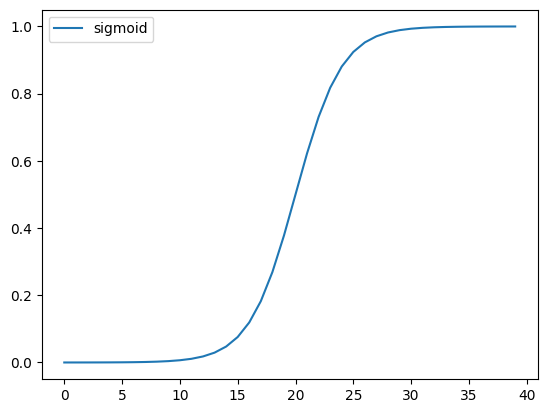

In [42]:
x: np.ndarray = np.arange(-10, 10, 0.5)
sig = sigmoid(x)
plt.plot(sig)
plt.legend(['sigmoid'])

## Cost function
> For logistic regression it is not possible to use the mean squared error as cost function, because the cost function would be non-convex. This is because the sigmoid function is non-linear and the cost function would therefore have many local minima.
 > Therefore the cost function is defined as the negative log-likelihood of the data given the parameters $w$. Negative because the cost function should be minimized.
> The cost function is defined as: $$J(w) = \frac{1}{m} \sum_{i=1}^{m} -y^{(i)} log(h_w(x^{(i)})) - (1 - y^{(i)}) log(1 - h_w(x^{(i)}))$$

In [43]:
def cost_function(label: np.ndarray, prediction: np.ndarray) -> float:
    """
    Calculates the cost function for logistic regression.
    :param label: The true labels.
    :param prediction: The predicted labels.
    :return: The cost.
    """
    m: int = len(label)
    return -1 / m * np.sum(label * np.log(prediction) + (1 - label) * np.log(1 - prediction))

## Model
- Hypothesis: $$h_w(x) = sigmoid(w x^T + w_0)$$
- Outputs: $\hat y$ the predicted class

##### Weights
- Intercept: $w_0$ (bias, not multiplied with any feature)
- Weights: $w_i$ (multiplied with feature $x_i$)
Weights do not influence the probability linearly as the output is between 0 and 1.

In [44]:
w_0: float = 1
w_1: float = 1
w_2: float = 1
W = np.array([w_1, w_2])

# Learning rate
alpha: float = 0.01
epochs: int = 5000

Weight update rule for intercept: $w_0 \leftarrow w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})$
Weight update rule for weights: $w_j \leftarrow w_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) x_j^{(i)}$

In [45]:
for epoch in range(epochs):
    y_hat: float = sigmoid(np.dot(W, X.T) + w_0)
    cost = cost_function(y, y_hat)
    w_0 = w_0 - alpha * (1 / len(y)) * np.sum(y_hat - y)
    W = W - alpha * (1 / len(y)) * np.dot((y_hat - y), X)
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Cost: {cost}')


Epoch: 0, Cost: 1.4153679559144356
Epoch: 100, Cost: 0.8653252625724566
Epoch: 200, Cost: 0.6352094666349204
Epoch: 300, Cost: 0.6012624143886699
Epoch: 400, Cost: 0.5850720221693048
Epoch: 500, Cost: 0.5700194903521622
Epoch: 600, Cost: 0.5556217969863312
Epoch: 700, Cost: 0.5418350365666789
Epoch: 800, Cost: 0.5286261977915697
Epoch: 900, Cost: 0.5159640530072231
Epoch: 1000, Cost: 0.503818962413672
Epoch: 1100, Cost: 0.4921628659860017
Epoch: 1200, Cost: 0.48096926311579175
Epoch: 1300, Cost: 0.4702131765986636
Epoch: 1400, Cost: 0.4598711042085215
Epoch: 1500, Cost: 0.4499209611363297
Epoch: 1600, Cost: 0.44034201612770163
Epoch: 1700, Cost: 0.43111482368153226
Epoch: 1800, Cost: 0.4222211542348395
Epoch: 1900, Cost: 0.4136439238701982
Epoch: 2000, Cost: 0.4053671247444413
Epoch: 2100, Cost: 0.39737575714958906
Epoch: 2200, Cost: 0.3896557638760101
Epoch: 2300, Cost: 0.3821939673492654
Epoch: 2400, Cost: 0.37497800985102203
Epoch: 2500, Cost: 0.3679962970058376
Epoch: 2600, Cost: 0

In [46]:
pred = sigmoid(np.dot(W, X.T) + w_0)
print(pred)
print(y)

[0.26075186 0.39207597 0.92897536 0.79642772 0.87735152]
[0 0 1 1 1]


In [47]:
from oli.ml.models.LogisticRegression import LogisticRegression

oli_lr = LogisticRegression(alpha=0.01, epochs=5000)
oli_lr.fit(X, y)
oli_pred = oli_lr.predict(X)
print(oli_pred)
print(y)

Epoch: 0, Cost: 0.6931471805599454
Epoch: 100, Cost: 0.5755523418967056
Epoch: 200, Cost: 0.5605148967808153
Epoch: 300, Cost: 0.5472709947148076
Epoch: 400, Cost: 0.5345578376230535
Epoch: 500, Cost: 0.5223253793184024
Epoch: 600, Cost: 0.5105493474296509
Epoch: 700, Cost: 0.4992072070877218
Epoch: 800, Cost: 0.4882776292508897
Epoch: 900, Cost: 0.47774044763683526
Epoch: 1000, Cost: 0.4675766158888017
Epoch: 1100, Cost: 0.45776815985375885
Epoch: 1200, Cost: 0.44829812704894056
Epoch: 1300, Cost: 0.4391505347192632
Epoch: 1400, Cost: 0.4303103175419364
Epoch: 1500, Cost: 0.4217632757998076
Epoch: 1600, Cost: 0.41349602465410995
Epoch: 1700, Cost: 0.4054959449875877
Epoch: 1800, Cost: 0.39775113615628777
Epoch: 1900, Cost: 0.39025037087950654
Epoch: 2000, Cost: 0.3829830524094544
Epoch: 2100, Cost: 0.3759391740522498
Epoch: 2200, Cost: 0.3691092810571447
Epoch: 2300, Cost: 0.362484434848941
Epoch: 2400, Cost: 0.35605617954717045
Epoch: 2500, Cost: 0.3498165106928514
Epoch: 2600, Cost:

## Decision boundary
> The decision boundary is the line that separates the area where $y = 0$ and where $y = 1$. It is created by the hypothesis function.
> The decision boundary is defined by the weights and the incercept. In this case for two features: $$w_0 + w_1 x_1 + w_2 x_2$$
> In general: $$w_0 +\sum_{i=1}^{n} w_i x_i$$

boundary_xs [1 2]
w_0 -3.448244025747198
W[0] 1.802709541546034
W[1] 0.6034700849445969
boundary_ys [ 2.72678717 -0.26045211]


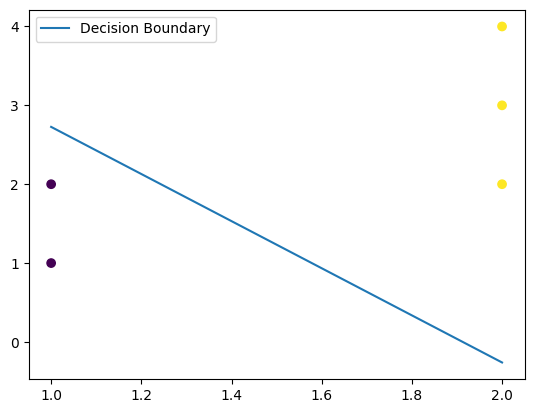

In [48]:
# Plot data.
plt.scatter(X[:, 0], X[:, 1], c=y)

# Determine length of visualized boundary based on min and max values of features.
boundary_xs = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
print("boundary_xs", boundary_xs)
# The boundary line is of the form w_0 + w_1*x_1 + w_2*x_2 = 0.
boundary_ys = (-1. / W[1]) * (W[0] * boundary_xs + w_0)
print("w_0", w_0)
print("W[0]", W[0])
print("W[1]", W[1])
print("boundary_ys", boundary_ys)
plt.plot(boundary_xs, boundary_ys, label='Decision Boundary')

plt.legend()
plt.show()